In [1]:
# Importing dependencies
import os
import pandas as pd
import sklearn.datasets as dta
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from scipy.stats import linregress
import scipy.stats as stats
import numpy as np
from sklearn import datasets
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.listdir()

['.config', 'drive', 'sample_data']

In [5]:
file_path = '/content/drive/MyDrive/Data.csv'
file_path

'/content/drive/MyDrive/Data.csv'

In [11]:
import pandas as pd
file_path = '/content/drive/MyDrive/Data.csv'
df = pd.read_csv(file_path)

FileNotFoundError: ignored

In [ ]:
# List files in the current directory to check upload was successful
os.listdir()

['.config', 'drive', 'sample_data']

In [ ]:
# Read the uploaded CSV file into a DataFrame
airline_data = pd.read_csv("Data.csv")

FileNotFoundError: ignored

In [ ]:
# Display the dataset
airline_data.head()

,YEAR,MONTH,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,...,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,airline_name,Description,Code.y
0,2018,1,1/9/18 00:00,AS,498,14057,12892,-13.0,0.0,0.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,Alaska,"Portland, OR: Portland International",PDX
1,2018,1,1/9/18 00:00,AS,502,14057,12892,-12.0,0.0,0.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,Alaska,"Portland, OR: Portland International",PDX
2,2018,1,1/9/18 00:00,AS,532,14057,14679,-5.0,0.0,0.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,Alaska,"Portland, OR: Portland International",PDX
3,2018,1,1/9/18 00:00,AS,540,14057,12892,-11.0,0.0,0.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,Alaska,"Portland, OR: Portland International",PDX
4,2018,1,1/9/18 00:00,AS,544,14057,12892,-6.0,0.0,0.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,Alaska,"Portland, OR: Portland International",PDX


## CLEANING THE DATASET

In [ ]:
# Determining the shape of dataset
print(airline_data.dtypes)
airline_data.shape

YEAR                     int64
MONTH                    int64
FL_DATE                 object
OP_UNIQUE_CARRIER       object
OP_CARRIER_FL_NUM        int64
ORIGIN_AIRPORT_ID        int64
DEST_AIRPORT_ID          int64
DEP_DELAY              float64
DEP_DELAY_NEW          float64
DEP_DEL15              float64
DEP_DELAY_GROUP        float64
ARR_DELAY              float64
ARR_DELAY_NEW          float64
ARR_DEL15              float64
ARR_DELAY_GROUP        float64
CANCELLED                int64
CANCELLATION_CODE       object
DIVERTED                 int64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
airline_name            object
Description             object
Code.y                  object
dtype: object


(2359976, 26)

In [ ]:
# Checking null counts across columns
null_counts = airline_data.isnull().sum()
print(null_counts)

YEAR                         0
MONTH                        0
FL_DATE                      0
OP_UNIQUE_CARRIER            0
OP_CARRIER_FL_NUM            0
ORIGIN_AIRPORT_ID            0
DEST_AIRPORT_ID              0
DEP_DELAY                45474
DEP_DELAY_NEW            45474
DEP_DEL15                45474
DEP_DELAY_GROUP          45474
ARR_DELAY                51526
ARR_DELAY_NEW            51526
ARR_DEL15                51526
ARR_DELAY_GROUP          51526
CANCELLED                    0
CANCELLATION_CODE      2313116
DIVERTED                     0
CARRIER_DELAY          1916035
WEATHER_DELAY          1916035
NAS_DELAY              1916035
SECURITY_DELAY         1916035
LATE_AIRCRAFT_DELAY    1916035
airline_name                 0
Description                  0
Code.y                       0
dtype: int64


In [ ]:
# Impute missing values in numeric columns with the mean
numeric_columns = ['DEP_DELAY', 'ARR_DELAY', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
for column in numeric_columns:
    airline_data[column].fillna(airline_data[column].mean(), inplace=True)

In [ ]:
# Checking null counts again
null_counts = airline_data.isnull().sum()
print(null_counts)

YEAR                         0
MONTH                        0
FL_DATE                      0
OP_UNIQUE_CARRIER            0
OP_CARRIER_FL_NUM            0
ORIGIN_AIRPORT_ID            0
DEST_AIRPORT_ID              0
DEP_DELAY                    0
DEP_DELAY_NEW            45474
DEP_DEL15                45474
DEP_DELAY_GROUP          45474
ARR_DELAY                    0
ARR_DELAY_NEW            51526
ARR_DEL15                51526
ARR_DELAY_GROUP          51526
CANCELLED                    0
CANCELLATION_CODE      2313116
DIVERTED                     0
CARRIER_DELAY                0
WEATHER_DELAY                0
NAS_DELAY                    0
SECURITY_DELAY               0
LATE_AIRCRAFT_DELAY          0
airline_name                 0
Description                  0
Code.y                       0
dtype: int64


In [ ]:
# Creating subset of data, to use required columns for analysis
SUBSET_COLS = ["ORIGIN_AIRPORT_ID", "Description",  "OP_UNIQUE_CARRIER",
               "airline_name", "YEAR", "MONTH", "FL_DATE", "OP_CARRIER_FL_NUM",
               "DEST_AIRPORT_ID", "DEP_DELAY","ARR_DELAY", "CANCELLED", "DIVERTED"]
subset_data = airline_data.loc[:, SUBSET_COLS].dropna()
null_counts = subset_data.isnull().sum()
print(null_counts)
print(subset_data.shape)

ORIGIN_AIRPORT_ID    0
Description          0
OP_UNIQUE_CARRIER    0
airline_name         0
YEAR                 0
MONTH                0
FL_DATE              0
OP_CARRIER_FL_NUM    0
DEST_AIRPORT_ID      0
DEP_DELAY            0
ARR_DELAY            0
CANCELLED            0
DIVERTED             0
dtype: int64
(2359976, 13)


In [ ]:
# Checking for min/max cancelled and diverted flights
max_cancelled = airline_data['CANCELLED'].max()
min_cancelled = airline_data['CANCELLED'].min()
max_diverted = airline_data['DIVERTED'].max()
min_diverted = airline_data['DIVERTED'].min()

print("Max CANCELLED:", max_cancelled)
print("Min CANCELLED:", min_cancelled)
print("Max DIVERTED:", max_diverted)
print("Min DIVERTED:", min_diverted)

Max CANCELLED: 1
Min CANCELLED: 0
Max DIVERTED: 1
Min DIVERTED: 0


In [ ]:
# Calculating the number of cancelled and diverted flights
cancelled_count = airline_data['CANCELLED'].value_counts().get(1, 0)

diverted_count = airline_data['DIVERTED'].value_counts().get(1, 0)

print("Number of cancelled flights:", cancelled_count)
print("Number of diverted flights :", diverted_count)

Number of cancelled flights: 46860
Number of diverted flights : 4667


In [ ]:
# Calculating total arrival and departure delay to figure out on-time performance
airline_data["ARR_DELAY"].abs() + airline_data["DEP_DELAY"].abs()

0           59.000000
1           14.000000
2           13.000000
3           34.000000
4           18.000000
              ...    
2359971    338.000000
2359972    239.000000
2359973     74.000000
2359974     80.000000
2359975     11.641308
Length: 2359976, dtype: float64

In [ ]:
# Defining function to calculate actual Arrival Delay
def actual_delay(raw_delay):
    corrected_delay = max(0, raw_delay)
    return corrected_delay

In [ ]:
# Calculating total arrival and departure delay to figure out on-time performance
subset_data["ARR_DELAY"].map(actual_delay)
subset_data["DEP_DELAY"].map(actual_delay)

0            0.000000
1            0.000000
2            0.000000
3            0.000000
4            0.000000
              ...    
2359971    173.000000
2359972    120.000000
2359973     41.000000
2359974     36.000000
2359975      8.125578
Name: DEP_DELAY, Length: 2359976, dtype: float64

In [ ]:
# Apply the function to create a new column 'Actual Delay'
subset_data['Actual Arrival Delay'] = subset_data["ARR_DELAY"].map(actual_delay)
subset_data["Actual Departure Delay"]= subset_data["DEP_DELAY"].map(actual_delay)

In [ ]:
subset_data.head()

,ORIGIN_AIRPORT_ID,Description,OP_UNIQUE_CARRIER,airline_name,YEAR,MONTH,FL_DATE,OP_CARRIER_FL_NUM,DEST_AIRPORT_ID,DEP_DELAY,ARR_DELAY,CANCELLED,DIVERTED,ActualArrivalDelay,Actual Delay,Actual_Delay,Actual Arrival Delay,Actual Departure Delay
0,14057,"Portland, OR: Portland International",AS,Alaska,2018,1,1/9/18 00:00,498,12892,-13.0,-46.0,0,0,0.0,<function actual_delay at 0x79cea97396c0>,<function actual_delay at 0x79cea9524160>,0.0,0.0
1,14057,"Portland, OR: Portland International",AS,Alaska,2018,1,1/9/18 00:00,502,12892,-12.0,-2.0,0,0,0.0,<function actual_delay at 0x79cea97396c0>,<function actual_delay at 0x79cea9524160>,0.0,0.0
2,14057,"Portland, OR: Portland International",AS,Alaska,2018,1,1/9/18 00:00,532,14679,-5.0,-8.0,0,0,0.0,<function actual_delay at 0x79cea97396c0>,<function actual_delay at 0x79cea9524160>,0.0,0.0
3,14057,"Portland, OR: Portland International",AS,Alaska,2018,1,1/9/18 00:00,540,12892,-11.0,-23.0,0,0,0.0,<function actual_delay at 0x79cea97396c0>,<function actual_delay at 0x79cea9524160>,0.0,0.0
4,14057,"Portland, OR: Portland International",AS,Alaska,2018,1,1/9/18 00:00,544,12892,-6.0,12.0,0,0,12.0,<function actual_delay at 0x79cea97396c0>,<function actual_delay at 0x79cea9524160>,12.0,0.0


In [ ]:
# List of columns to delete
columns_to_delete = ['ActualArrivalDelay', 'Actual Delay', 'Actual_Delay', 'Actual Arrival Delay']

# Drop the specified columns from the DataFrame
subset_data.drop(columns=columns_to_delete, inplace=True)

In [ ]:
subset_data.head()

,ORIGIN_AIRPORT_ID,Description,OP_UNIQUE_CARRIER,airline_name,YEAR,MONTH,FL_DATE,OP_CARRIER_FL_NUM,DEST_AIRPORT_ID,DEP_DELAY,ARR_DELAY,CANCELLED,DIVERTED,Actual Departure Delay
0,14057,"Portland, OR: Portland International",AS,Alaska,2018,1,1/9/18 00:00,498,12892,-13.0,-46.0,0,0,0.0
1,14057,"Portland, OR: Portland International",AS,Alaska,2018,1,1/9/18 00:00,502,12892,-12.0,-2.0,0,0,0.0
2,14057,"Portland, OR: Portland International",AS,Alaska,2018,1,1/9/18 00:00,532,14679,-5.0,-8.0,0,0,0.0
3,14057,"Portland, OR: Portland International",AS,Alaska,2018,1,1/9/18 00:00,540,12892,-11.0,-23.0,0,0,0.0
4,14057,"Portland, OR: Portland International",AS,Alaska,2018,1,1/9/18 00:00,544,12892,-6.0,12.0,0,0,0.0


In [ ]:
# Convert numeric month to month name
subset_data['MONTH'] = subset_data['MONTH'].apply(lambda x: pd.Timestamp(year=subset_data['YEAR'].iloc[0], month=x, day=1).strftime('%B'))

# Remove the timestamp from the 'FL_DATE' column
subset_data['FL_DATE'] = pd.to_datetime(subset_data['FL_DATE']).dt.strftime('%m/%d/%y')


In [ ]:
# Calculate the airline with the maximum delay
average_arrival_delay = airline_data.groupby('airline_name')['ARR_DELAY'].mean()

# Find the airline with the maximum average arrival delay
airline_with_max_delay = average_arrival_delay.idxmax()
max_avg_delay = average_arrival_delay.max()

# Print the result
print(f"The airline with the maximum average arrival delay is {airline_with_max_delay} with an average delay of {max_avg_delay} minutes.")

The airline with the maximum average arrival delay is Frontier with an average delay of 7.865047169087845 minutes.


In [ ]:
# Calculate the airline with the maximum delay
average_dep_delay = airline_data.groupby('airline_name')['DEP_DELAY'].mean()

# Find the airline with the maximum average arrival delay
airline_with_max_delay = average_arrival_delay.idxmax()
max_avg_delay = average_dep_delay.max()

# Print the result
print(f"The airline with the maximum average departure delay is {airline_with_max_delay} with an average delay of {max_avg_delay} minutes.")

The airline with the maximum average departure delay is Frontier with an average delay of 13.287232982476926 minutes.


In [ ]:
# Calculating # of on-time flights for top 3 airlines
on_time_flights = len(subset_data[subset_data["ActualArrivalDelay"] == 0])
print(f"Number of on-time flights: {on_time_flights}")
on_time_flights = subset_data[subset_data["ActualArrivalDelay"] == 0].groupby("airline_name").size()
print(on_time_flights)

Number of on-time flights: 1494196
airline_name
Alaska      618994
Frontier    340804
Spirit      534398
dtype: int64


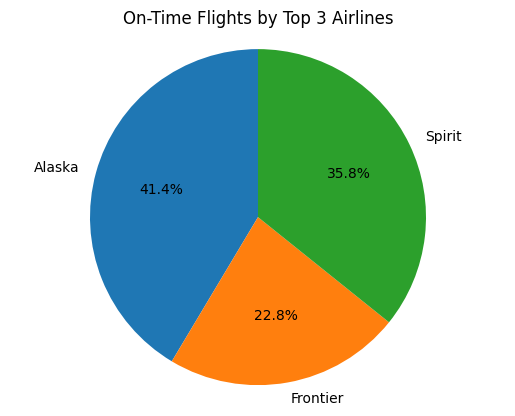

In [ ]:
import matplotlib.pyplot as plt

# Creating a Pie-Chart based on time performance
labels = ['Alaska', 'Frontier', 'Spirit']
sizes = [618994, 340804, 534398]

# Create a 2D pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("On-Time Flights by Top 3 Airlines")

# Show the pie chart
plt.axis('equal')
plt.show()

## CREATING VISUALIZATIONS

#### ON-TIME PERFORMANCE VS YEAR

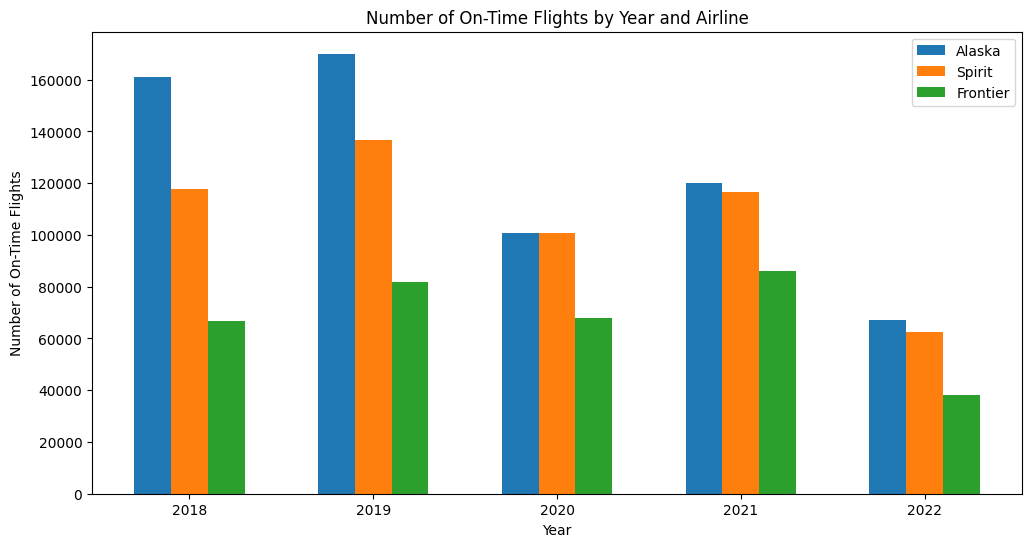

In [ ]:
# Group data by year and airline, and count the number of on-time flights
on_time_counts = subset_data[subset_data["ActualArrivalDelay"] == 0].groupby(["YEAR", "airline_name"]).size()
# Get unique airlines in the dataset
airlines = subset_data["airline_name"].unique()

# Create a clustered bar chart
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the figure size as needed
width = 0.2
years = on_time_counts.index.get_level_values('YEAR').unique()

for i, airline in enumerate(airlines):
    on_time_counts_airline = on_time_counts.loc[(slice(None), airline)]
    positions = np.arange(len(years)) + i * width
    ax.bar(positions, on_time_counts_airline, width=width, label=airline)

ax.set_xticks(np.arange(len(years)) + (len(airlines) / 2 - 0.5) * width)
ax.set_xticklabels(years)
ax.set_xlabel("Year")
ax.set_ylabel("Number of On-Time Flights")
ax.set_title("Number of On-Time Flights by Year and Airline")
ax.legend()

plt.show()

#### No.of Flights vs Months

Hypothesis: On-time performance of flights improved during COVID-19 as number of flights reduced

#### Top 3 Airlines based on On-Time Arrival/Delay

Airlines with the highest on-time performance:
airline_name
Spirit      64.734634
Alaska      63.968394
Frontier    60.127841
dtype: float64


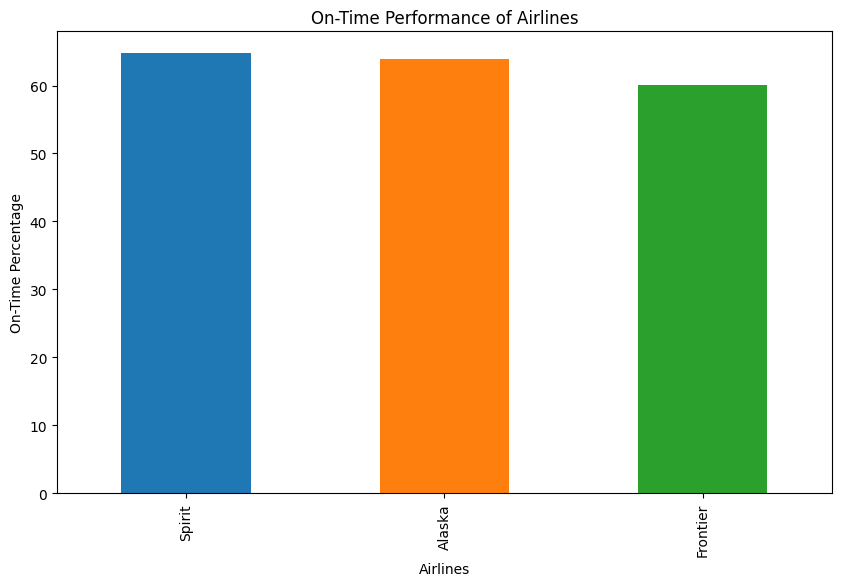

In [ ]:
# Calculate the total number of flights for each airline
total_flights = subset_data.groupby('airline_name').size()
# Calculate the number of on-time flights for each airline
on_time_flights = subset_data[subset_data['ActualArrivalDelay'] == 0].groupby('airline_name').size()
# Calculate the percentage of on-time flights for each airline
on_time_percentage = (on_time_flights / total_flights) * 100
# Sort the airlines based on the on-time percentage in descending order
sorted_airlines = on_time_percentage.sort_values(ascending=False)
# Print the airlines with the highest on-time performance
print("Airlines with the highest on-time performance:")
print(sorted_airlines.head())
# Generate a list of colors for each airline
colors = plt.cm.tab10(np.arange(len(sorted_airlines)))
# Visualize the on-time performance using a bar plot with different colors
plt.figure(figsize=(10, 6))
sorted_airlines.plot(kind='bar', color=colors)
plt.xlabel('Airlines')
plt.ylabel('On-Time Percentage')
plt.title('On-Time Performance of Airlines')
plt.show()

In [ ]:
# Define the delay intervals
delay_intervals = [0, 20, 30, 60]

# Create a new column 'DelayCategory' to categorize flights based on delay intervals
subset_data['DelayCategory'] = pd.cut(subset_data['ARR_DELAY'], bins=delay_intervals, labels=['0-10', '11-20', '21-30', '31-60', '60+'])

# Group flights by the 'DelayCategory' column and count the number of flights in each category
delay_counts = airline_data.groupby('DelayCategory').size().reset_index(name='FlightCount')

# Print the result
print(delay_counts)